<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('iris.data',header=None)
targets = data[4]
no_labeled_data = data.drop([4], axis=1)
no_labeled_data = np.array(no_labeled_data)
no_labeled_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

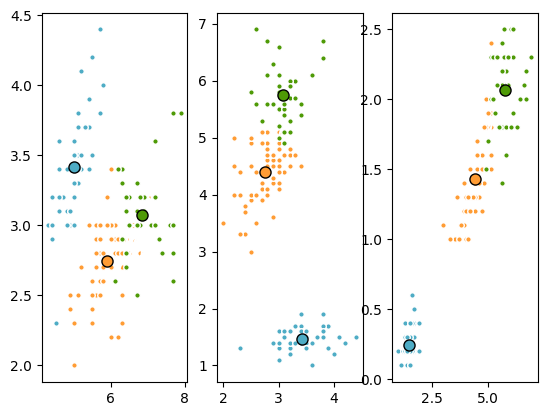

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for i in range(3):
    my_members = k_means_labels == i
    cluster_center = k_means_cluster_centers[i]
    for j in range(3):
        ax[j].plot(no_labeled_data[my_members, j], no_labeled_data[my_members, j + 1], 'w', markerfacecolor=colors[i],
                   marker='o', markersize=4)
        ax[j].plot(cluster_center[j], cluster_center[j + 1], 'o', markerfacecolor=colors[i],
                   markeredgecolor='k', markersize=8)
plt.show()

Результат - наилучшие разбиения для выборок (разбиения по признакам 1, 2, 3). Наилучшее разбиение произошло по 2 и 3 признакам. n_init - cколько раз алгоритм k-средних запускается с разными начальными значениями центроидов.

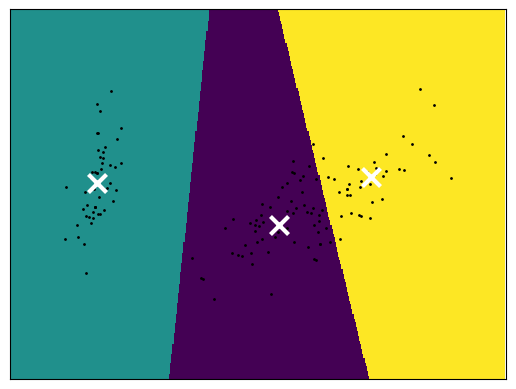

In [ ]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit_transform(no_labeled_data)
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=15)
kmeans.fit(pca_data)
h = 0.02

x_min, x_max = pca_data[:, 0].min() - 1, pca_data[:, 0].max() + 1
y_min, y_max = pca_data[:, 1].min() - 1, pca_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
)

plt.plot(pca_data[:, 0], pca_data[:, 1], "k.", markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

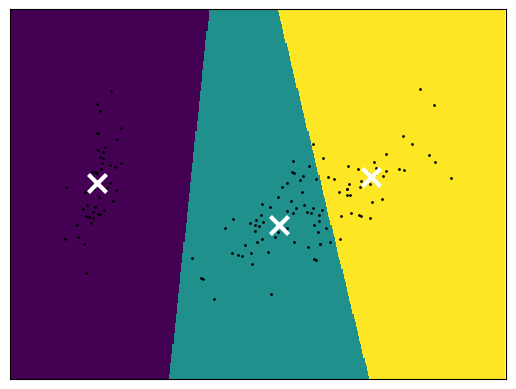

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)
kmeans = KMeans(init="random", n_clusters=3, n_init=15)
kmeans.fit(reduced_data)
h = 0.02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

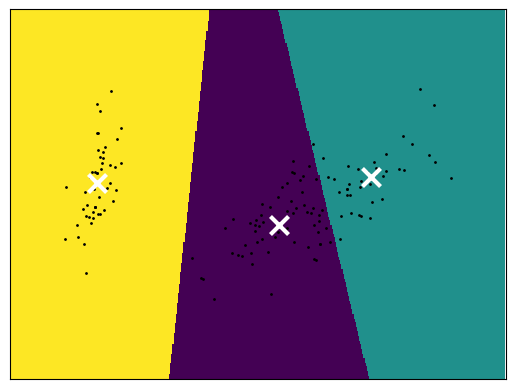

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)
kmeans = KMeans(init="random", n_clusters=3, n_init=15)
kmeans.fit(reduced_data)
h = 0.02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=15.
  super()._check_params_vs_input(X, default_n_init=10)


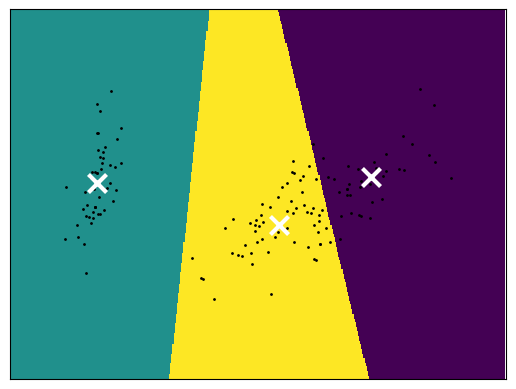

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(no_labeled_data)
kmeans = KMeans(init=[[0.8214601901093885, 0.5541454813029867],
                      [0.3665659733969795, 0.6806391264278521],
                      [0.9095191052506546, 0.3494270122047354]], n_clusters=3, n_init=15)

kmeans.fit(reduced_data)
h = 0.02

x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

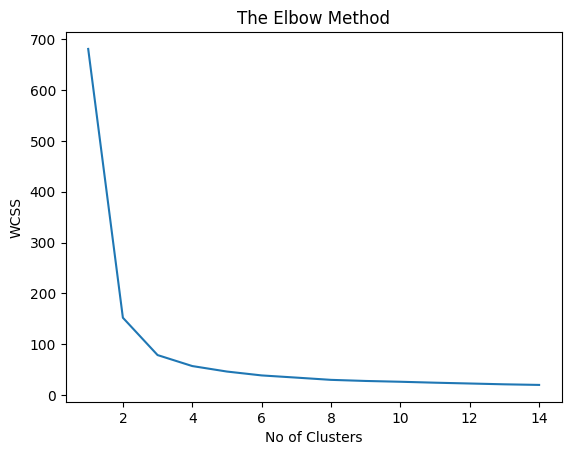

In [ ]:
wcss=[]
for i in range(1,15):
    kmean = KMeans(n_clusters=i,init="k-means++")
    kmean.fit_predict(no_labeled_data)
    wcss.append(kmean.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

Видим на графике, что точка локтя близка к 3. Поэтому мы возьмем значение кластера как 3

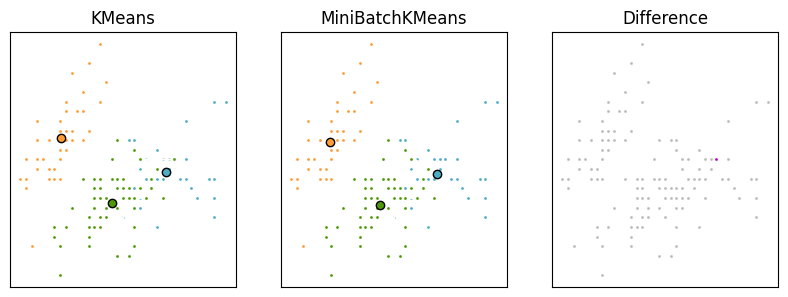

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

model_mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=32,
    n_init=15,
    max_no_improvement=10,
    verbose=0,
)
model_mbk.fit(no_labeled_data)

k_means = KMeans(init="k-means++", n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, model_mbk.cluster_centers_)
mbk_means_cluster_centers = model_mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(no_labeled_data, mbk_means_cluster_centers)

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(3), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(no_labeled_data[my_members, 0], no_labeled_data[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
# plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(3), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(no_labeled_data[my_members, 0], no_labeled_data[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
# plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_mini_batch, mbk.inertia_))

# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(3):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identic = np.logical_not(different)
ax.plot(no_labeled_data[identic, 0], no_labeled_data[identic, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(no_labeled_data[different, 0], no_labeled_data[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

Отличие заключается лишь в том, что в MiniBatchKMeans на input данные поступают batch'ами.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering(n_clusters=3, linkage='average')
hier = hier.fit(no_labeled_data)
hier_labels = hier.labels_

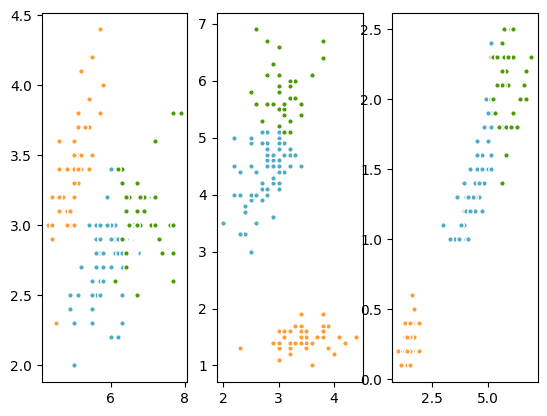

In [ ]:
f, ax = plt.subplots(1, 3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
for i in range(3):
    my_members = hier_labels == i
    for j in range(3):
        ax[j].plot(no_labeled_data[my_members, j],
        no_labeled_data[my_members, j+1], 'w',
        markerfacecolor=colors[i], marker='o', markersize=4)
plt.show()

C kmeans вы получаете n центроидов, которые можно использовать для вывода новых невидимых данных путем вычисления расстояния между новым экземпляром и каждым кластером, а затем назначить это новое наблюдение ближайшему. С агломерацией вы не генерируете никаких параметров, которые можно применить к новым наблюдениям, вам нужно снова формировать свои кластеры.

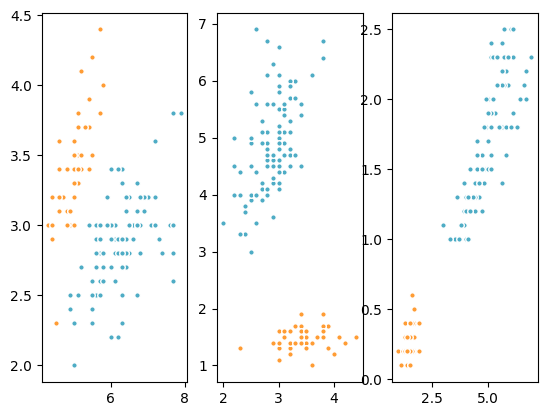

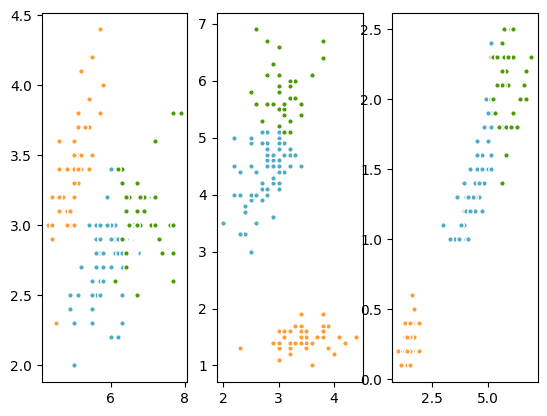

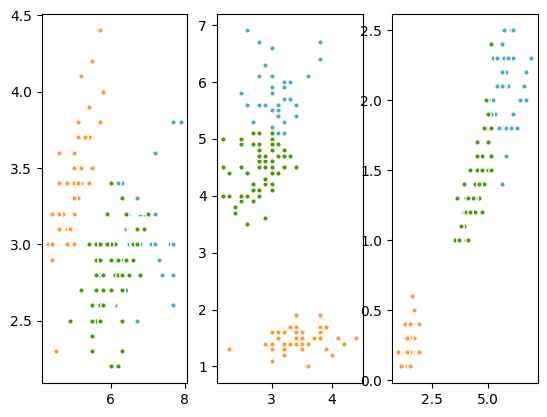

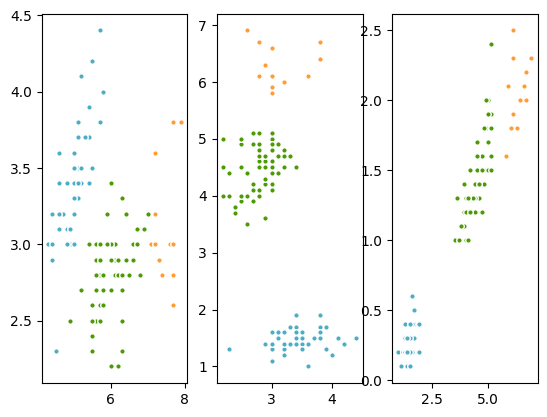

In [ ]:
for i in range(2, 6):
    hier = AgglomerativeClustering(n_clusters=i, linkage='average')
    hier = hier.fit(no_labeled_data)
    hier_labels = hier.labels_

    f, ax = plt.subplots(1, 3)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06']
    for i in range(3):
        my_members = hier_labels == i
        for j in range(3):
            ax[j].plot(no_labeled_data[my_members, j],
                       no_labeled_data[my_members, j + 1], 'w',
                       markerfacecolor=colors[i], marker='o', markersize=4)
    plt.show()

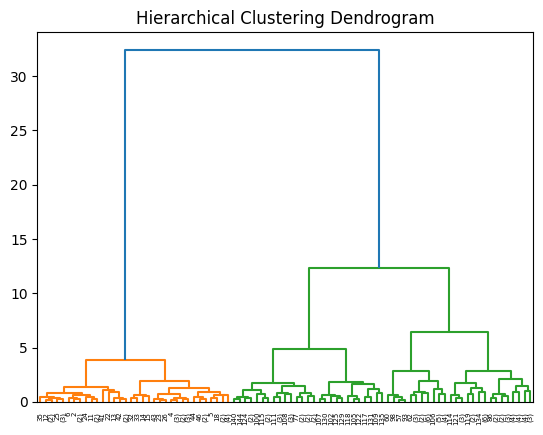

In [ ]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(n_clusters=3, compute_distances=True)

model = model.fit(no_labeled_data)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=6)
plt.show()

In [ ]:
import random
import math
data1 = np.zeros([250,2])
for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2 * math.pi)
    data1[i,0] = r * math.sin(a)
    data1[i,1] = r * math.cos(a)
data2 = np.zeros([500,2])
for i in range(500):
    r = random.uniform(5, 9)
    a = random.uniform(0, 2 * math.pi)
    data2[i,0] = r * math.sin(a)
    data2[i,1] = r * math.cos(a)
data = np.vstack((data1, data2))

In [ ]:
hier = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier = hier.fit(data)
hier_labels = hier.labels_

<ipython-input-43-058484270658>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
<ipython-input-43-058484270658>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',


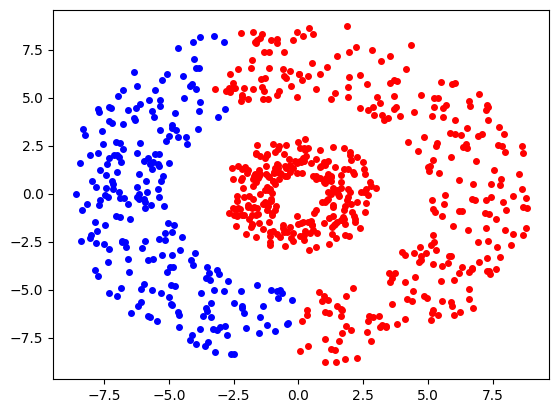

In [ ]:
my_members = hier_labels == 0
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4, color='red',linestyle='None')
my_members = hier_labels == 1
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4,
         color='blue',linestyle='None')
plt.show()

linkage = {‘ward’, ‘complete’, ‘average’, ‘single’}

<ipython-input-45-48756d7cc045>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
<ipython-input-45-48756d7cc045>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',


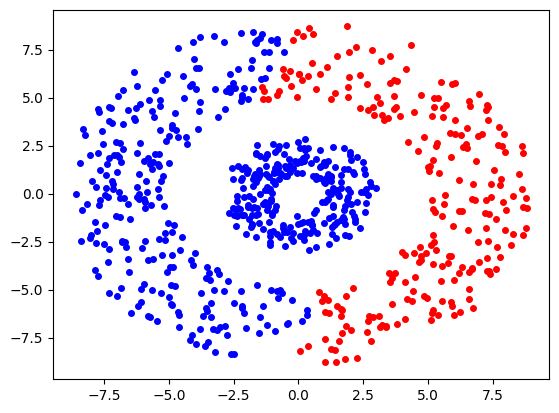

In [ ]:
hier = AgglomerativeClustering(n_clusters=2, linkage='complete')
hier = hier.fit(data)
hier_labels = hier.labels_
my_members = hier_labels == 0
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4, color='red',linestyle='None')
my_members = hier_labels == 1
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4,
         color='blue',linestyle='None')
plt.show()

<ipython-input-46-cb78761ec60b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
<ipython-input-46-cb78761ec60b>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',


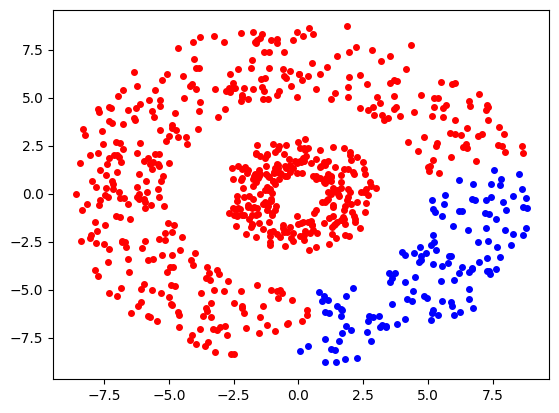

In [ ]:
hier = AgglomerativeClustering(n_clusters=2, linkage='average')
hier = hier.fit(data)
hier_labels = hier.labels_
my_members = hier_labels == 0
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4, color='red',linestyle='None')
my_members = hier_labels == 1
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4,
         color='blue',linestyle='None')
plt.show()

<ipython-input-47-491cc4da1de6>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
<ipython-input-47-491cc4da1de6>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',


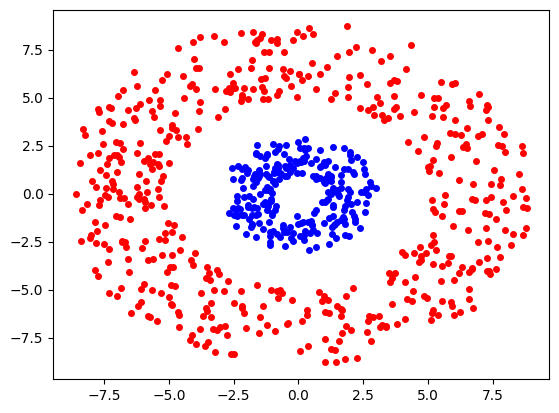

In [ ]:
hier = AgglomerativeClustering(n_clusters=2, linkage='single')
hier = hier.fit(data)
hier_labels = hier.labels_
my_members = hier_labels == 0
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4, color='red',linestyle='None')
my_members = hier_labels == 1
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
         markersize=4,
         color='blue',linestyle='None')
plt.show()

Какой критерий связи использовать. Критерий связи определяет, какое расстояние использовать между наборами наблюдений. Алгоритм объединит пары кластеров, которые минимизируют этот критерий.

~'ward' минимизирует дисперсию объединяемых кластеров.

~'average' использует среднее значение расстояний каждого наблюдения двух наборов.

~'complete' или «максимальная» связь использует максимальные расстояния между всеми наблюдениями двух наборов.

~'single' использует минимум расстояний между всеми наблюдениями двух наборов.